# Exploratory Data Analysis for Dengue AI Project - Iquito
Data source: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/ <BR>
Features: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/

In [1]:
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline
import myutil_dviz as myutil
import warnings
warnings.filterwarnings('ignore')
import sys
print(sys.executable)

/Users/carlos2/anaconda/envs/dsdht/bin/python


In [2]:
import importlib
_ = importlib.reload(myutil)

## Get data and take first look at dataset

In [3]:
dfx_train = myutil.get_indexed_dataset('data/dengue_features_train.csv')
dfy_train = myutil.get_indexed_dataset('data/dengue_labels_train.csv')
dftrain = myutil.set_index(pd.merge(dfx_train, dfy_train))
dftrain.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
yearweekofyear,,,,,,,,,,,,,,,,,,,,,
199018,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
199019,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
199020,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
199021,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
199022,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


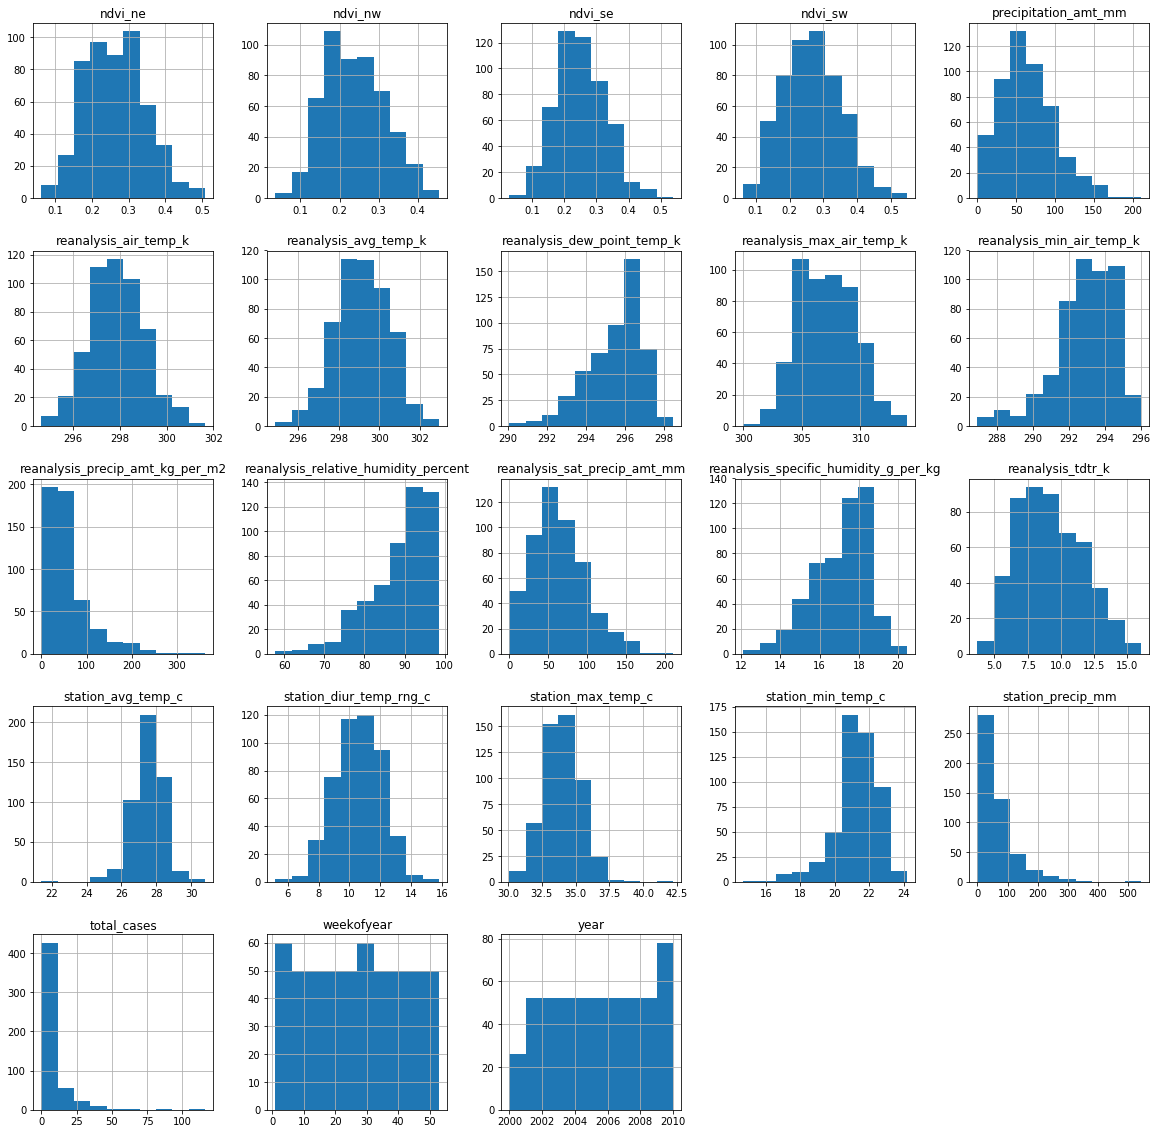

In [4]:
_ = dftrain[dftrain['city']=='iq'].hist(bins=10, figsize=(20,20))

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 199018 to 201025
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_prec

## Deal with NaN on both training and test datasets together

In [6]:
dftrain.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [7]:
# all nan values will be replaced with the mean for the week of the year
dftrain = myutil.set_nan_to_week_mean(dftrain.copy())
dftrain.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

## Split dataset - Will analyze San Juan data only

In [8]:
dftrain_iq, dftrain_sj = myutil.split_dataset_by_city(dftrain)
dftrain = dftrain_iq.copy()

In [9]:
dfcorr = dftrain.drop(['city','year','weekofyear','week_start_date','total_cases'], axis=1)
dfcorr.corr()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
ndvi_ne,1.000000,0.569397,0.523149,0.584429,-0.053800,0.129052,0.150746,-0.011521,0.213759,-0.011986,-0.054662,-0.098611,-0.053800,-0.009653,0.163985,0.134410,0.188391,0.167516,-0.047040,-0.075290
ndvi_nw,0.569397,1.000000,0.608150,0.725426,-0.064554,0.129514,0.150736,-0.026595,0.200037,-0.010963,-0.063661,-0.108980,-0.064554,-0.024016,0.165818,0.131382,0.212081,0.155041,-0.086769,-0.034381
ndvi_se,0.523149,0.608150,1.000000,0.715573,-0.040512,0.195233,0.208587,-0.062317,0.261749,-0.027647,-0.120210,-0.187569,-0.040512,-0.060032,0.223665,0.115719,0.193138,0.169516,-0.060751,0.008815
ndvi_sw,0.584429,0.725426,0.715573,1.000000,-0.013498,0.161430,0.178103,-0.027168,0.235650,-0.008064,-0.059247,-0.133275,-0.013498,-0.023225,0.180471,0.127520,0.196318,0.190842,-0.061340,-0.009237
precipitation_amt_mm,-0.053800,-0.064554,-0.040512,-0.013498,1.000000,-0.050098,-0.051628,0.474765,-0.211956,0.312410,0.342645,0.435933,1.000000,0.471717,-0.359735,0.120115,-0.171468,0.003091,0.306163,0.371580
reanalysis_air_temp_k,0.129052,0.129514,0.195233,0.161430,-0.050098,1.000000,0.971731,0.149538,0.736817,0.412629,-0.085885,-0.547287,-0.050098,0.175849,0.539844,0.593458,0.484114,0.625650,0.243238,-0.122435
reanalysis_avg_temp_k,0.150746,0.150736,0.208587,0.178103,-0.051628,0.971731,1.000000,0.144081,0.777528,0.389578,-0.105957,-0.534240,-0.051628,0.167926,0.598058,0.571156,0.497044,0.615212,0.213957,-0.125801
reanalysis_dew_point_temp_k,-0.011521,-0.026595,-0.062317,-0.027168,0.474765,0.149538,0.144081,1.000000,-0.239009,0.739198,0.573542,0.743109,0.474765,0.997766,-0.587747,0.329308,-0.247267,0.093701,0.614072,0.181026
reanalysis_max_air_temp_k,0.213759,0.200037,0.261749,0.235650,-0.211956,0.736817,0.777528,-0.239009,1.000000,-0.067693,-0.246526,-0.697521,-0.211956,-0.220324,0.805453,0.385706,0.600230,0.602254,-0.091840,-0.183576
reanalysis_min_air_temp_k,-0.011986,-0.010963,-0.027647,-0.008064,0.312410,0.412629,0.389578,0.739198,-0.067693,1.000000,0.390592,0.347677,0.312410,0.741865,-0.415105,0.380278,-0.095439,0.176239,0.585157,0.092682


## Analysis of temperature data

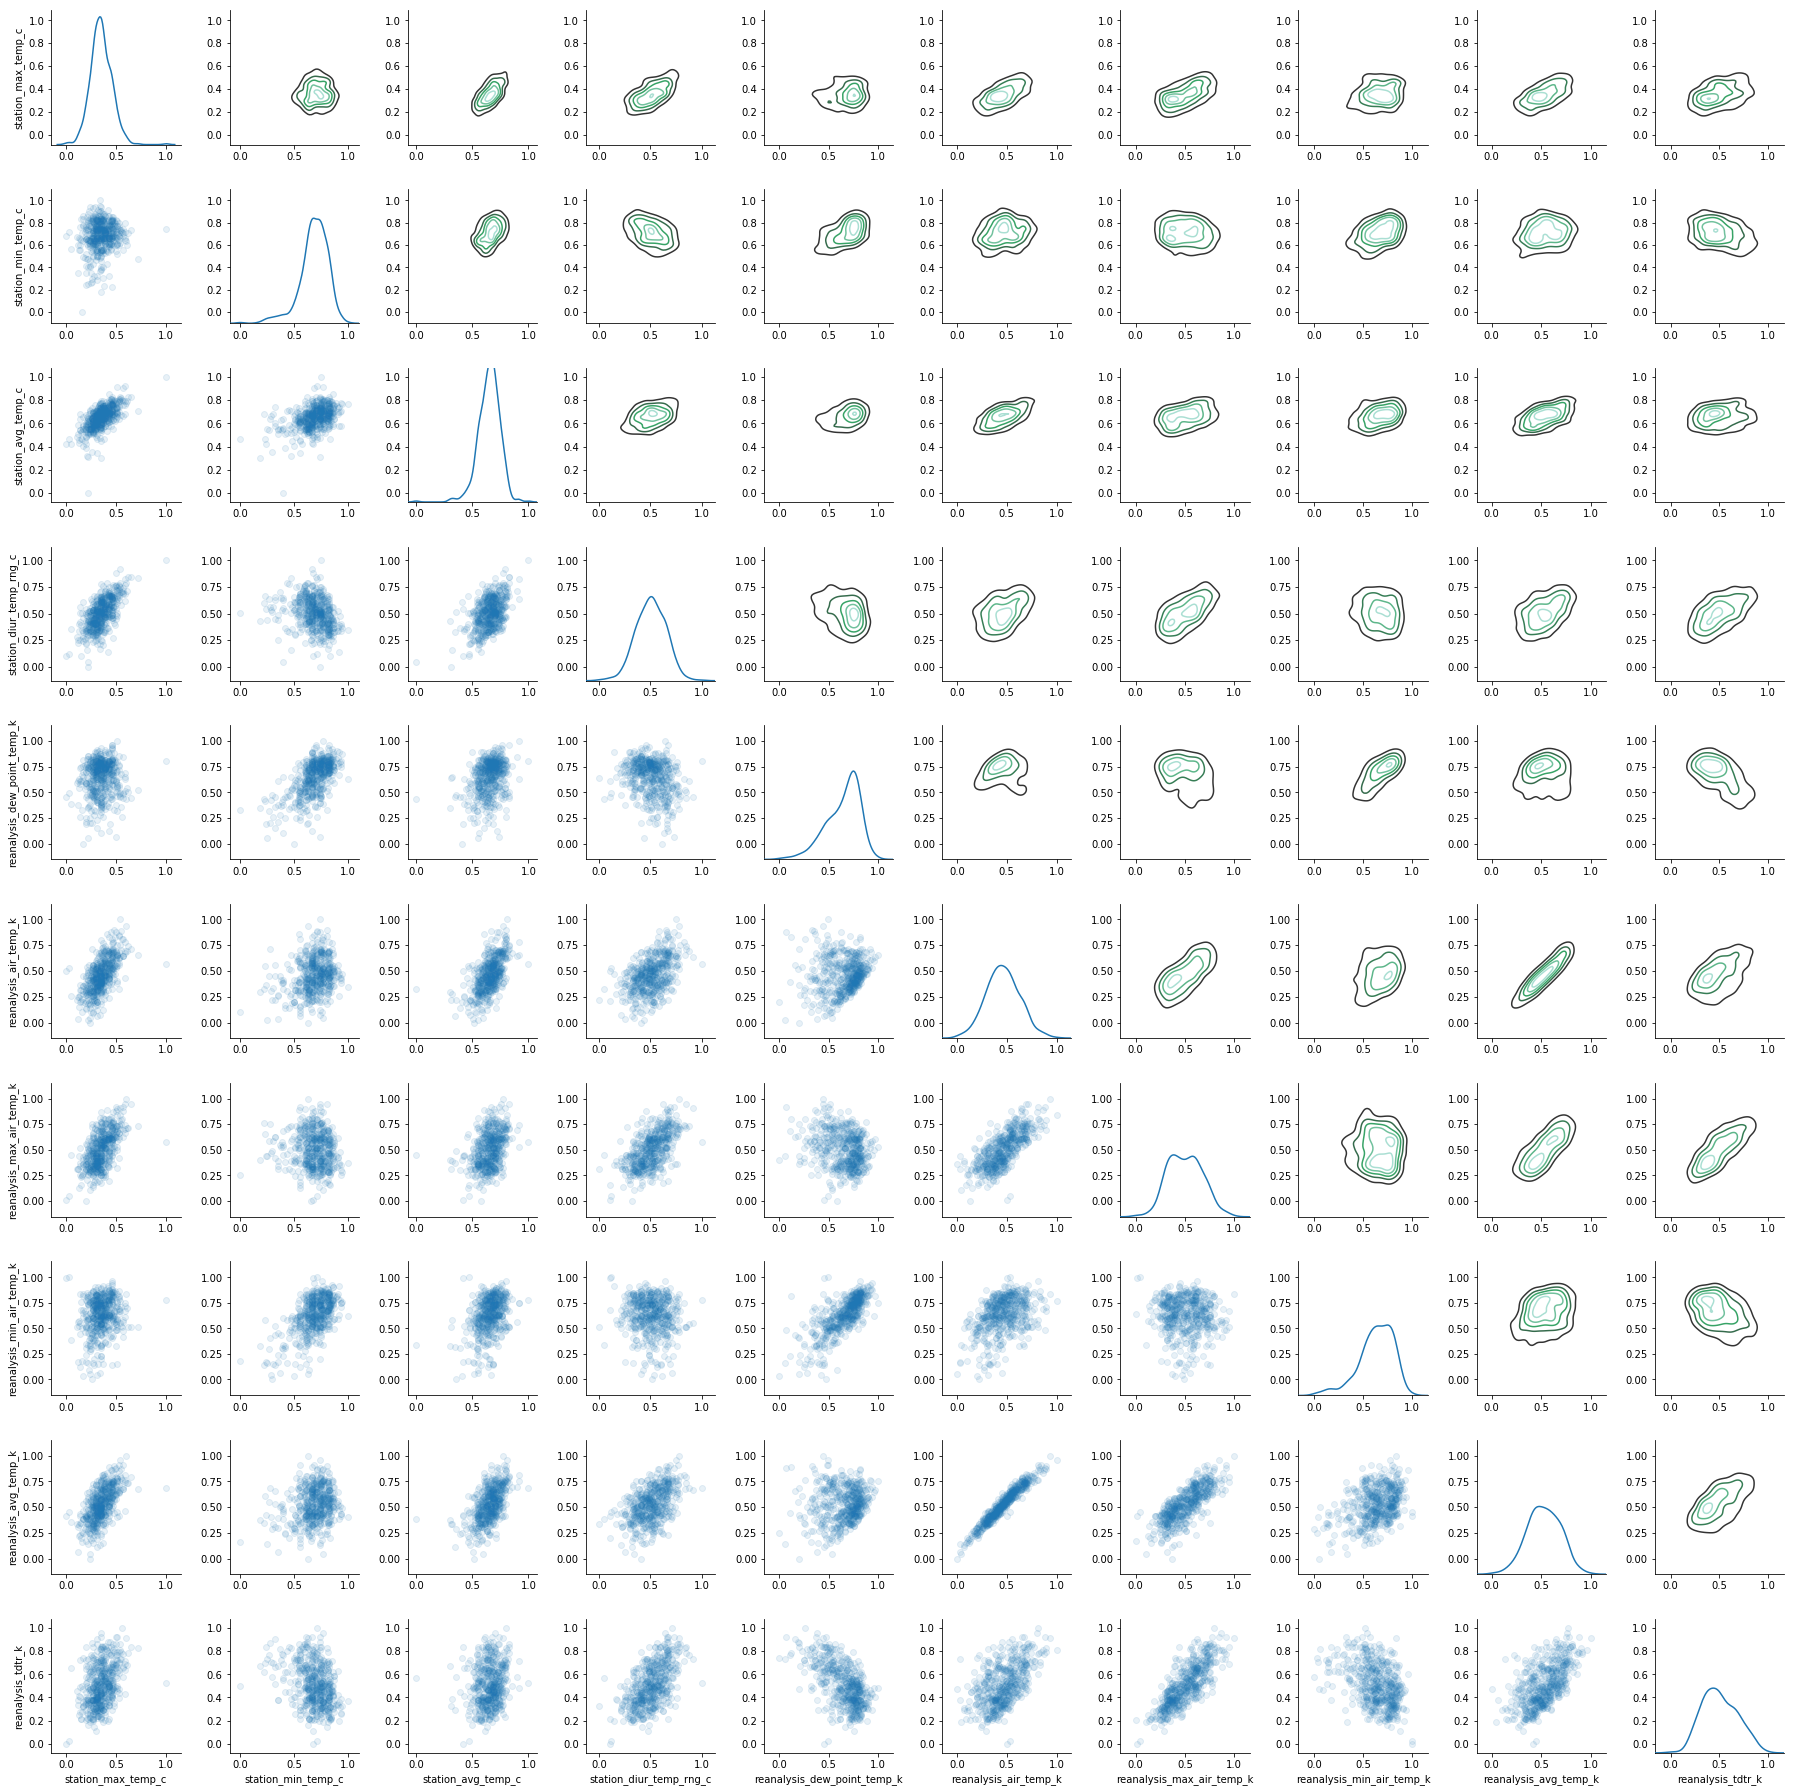

In [10]:
#columns = ['station_max_temp_c','station_min_temp_c','station_avg_temp_c','station_precip_mm',\
#           'station_diur_temp_rng_c','total_cases']

columns = ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c', 'station_diur_temp_rng_c',\
           'reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k', 'reanalysis_max_air_temp_k',\
           'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=5)

In [11]:
df.corr()

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,station_diur_temp_rng_c,reanalysis_dew_point_temp_k,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k
station_max_temp_c,1.000000,0.116527,0.658559,0.662892,0.093700,0.625650,0.602254,0.176239,0.615213,0.399929
station_min_temp_c,0.116527,1.000000,0.447156,-0.256954,0.614072,0.243238,-0.091840,0.585156,0.213958,-0.333658
station_avg_temp_c,0.658559,0.447156,1.000000,0.512475,0.329308,0.593457,0.385706,0.380278,0.571156,0.180925
station_diur_temp_rng_c,0.662892,-0.256954,0.512475,1.000000,-0.247267,0.484114,0.600230,-0.095439,0.497044,0.584820
reanalysis_dew_point_temp_k,0.093700,0.614072,0.329308,-0.247267,1.000000,0.149537,-0.239010,0.739198,0.144082,-0.587747
reanalysis_air_temp_k,0.625650,0.243238,0.593457,0.484114,0.149537,1.000000,0.736817,0.412629,0.971730,0.539844
reanalysis_max_air_temp_k,0.602254,-0.091840,0.385706,0.600230,-0.239010,0.736817,1.000000,-0.067693,0.777528,0.805453
reanalysis_min_air_temp_k,0.176239,0.585156,0.380278,-0.095439,0.739198,0.412629,-0.067693,1.000000,0.389579,-0.415105
reanalysis_avg_temp_k,0.615213,0.213958,0.571156,0.497044,0.144082,0.971730,0.777528,0.389579,1.000000,0.598057
reanalysis_tdtr_k,0.399929,-0.333658,0.180925,0.584820,-0.587747,0.539844,0.805453,-0.415105,0.598057,1.000000


In [12]:
df.describe(percentiles=[0.025, .25, .5, .75,.975])

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,station_diur_temp_rng_c,reanalysis_dew_point_temp_k,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.352327,0.684197,0.650350,0.505291,0.645936,0.462261,0.503861,0.632057,0.527392,0.505891
std,0.105627,0.131862,0.096729,0.143524,0.169275,0.166679,0.172212,0.176613,0.165254,0.178699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.5%,0.149160,0.326316,0.450266,0.226297,0.249697,0.137035,0.192860,0.158449,0.199979,0.210852
25%,0.290967,0.621053,0.595745,0.405660,0.538696,0.351306,0.371429,0.538733,0.414223,0.375429
50%,0.353992,0.700000,0.659575,0.509434,0.688107,0.456640,0.500000,0.654930,0.524889,0.490041
75%,0.419643,0.768421,0.709442,0.607311,0.772389,0.572689,0.621429,0.771128,0.650665,0.637620
97.5%,0.566702,0.873947,0.805053,0.767924,0.889878,0.810283,0.842857,0.877025,0.830312,0.856799
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Analysis of precipitation data

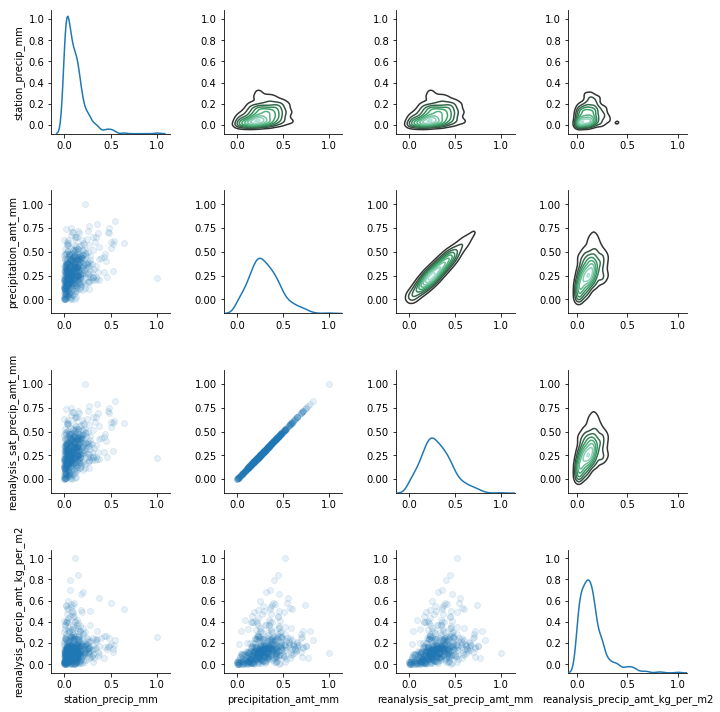

In [13]:
columns = ['station_precip_mm', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm',\
           'reanalysis_precip_amt_kg_per_m2']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=10)

In [14]:
df.corr()

,station_precip_mm,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
station_precip_mm,1.000000,0.371580,0.371580,0.153322
precipitation_amt_mm,0.371580,1.000000,1.000000,0.342645
reanalysis_sat_precip_amt_mm,0.371580,1.000000,1.000000,0.342645
reanalysis_precip_amt_kg_per_m2,0.153322,0.342645,0.342645,1.000000


In [15]:
df.describe(percentiles=[.25, .5, .75,.95])

,station_precip_mm,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
count,520.000000,520.000000,520.000000,520.000000
mean,0.114781,0.304082,0.304082,0.158798
std,0.114831,0.167013,0.167013,0.138567
min,0.000000,0.000000,0.000000,0.000000
25%,0.033131,0.185410,0.185410,0.066148
50%,0.084852,0.286534,0.286534,0.128277
75%,0.155485,0.406761,0.406761,0.196317
95%,0.339177,0.613748,0.613748,0.454940
max,1.000000,1.000000,1.000000,1.000000


## Analysis of humidity data 

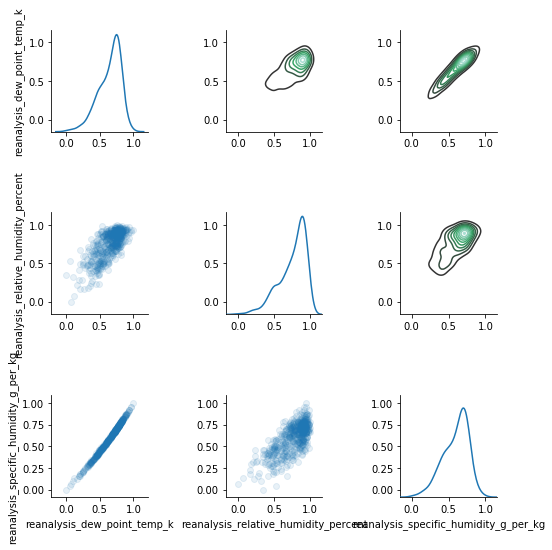

In [16]:
columns = ['reanalysis_dew_point_temp_k', 'reanalysis_relative_humidity_percent',\
           'reanalysis_specific_humidity_g_per_kg']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=10)

In [17]:
df.corr()

,reanalysis_dew_point_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
reanalysis_dew_point_temp_k,1.000000,0.743109,0.997766
reanalysis_relative_humidity_percent,0.743109,1.000000,0.724681
reanalysis_specific_humidity_g_per_kg,0.997766,0.724681,1.000000


In [18]:
df.describe(percentiles=[0.025, .25, .5, .75,.975])

,reanalysis_dew_point_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
count,520.000000,520.000000,520.000000
mean,0.645936,0.754839,0.596485
std,0.169275,0.185886,0.172999
min,0.000000,0.000000,0.000000
2.5%,0.249697,0.321024,0.205073
25%,0.538696,0.648088,0.477117
50%,0.688107,0.810995,0.636270
75%,0.772389,0.900633,0.726818
97.5%,0.889878,0.971585,0.861711
max,1.000000,1.000000,1.000000


## Analysis of location features

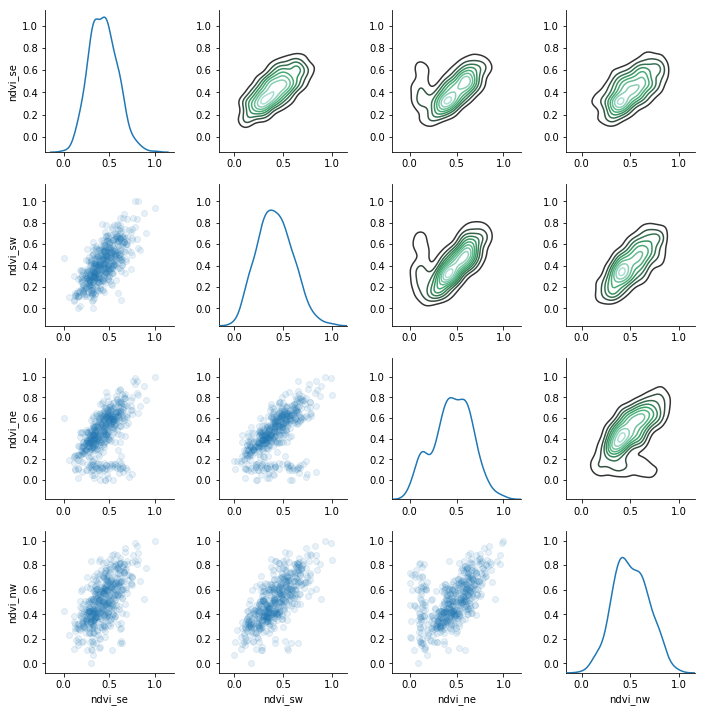

In [19]:
columns = ['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=10)

In [20]:
df.corr()

,ndvi_se,ndvi_sw,ndvi_ne,ndvi_nw
ndvi_se,1.000000,0.715573,0.523149,0.608150
ndvi_sw,0.715573,1.000000,0.584429,0.725426
ndvi_ne,0.523149,0.584429,1.000000,0.569397
ndvi_nw,0.608150,0.725426,0.569397,1.000000


In [21]:
df.describe(percentiles=[0.025, .25, .5, .75,.975])

,ndvi_se,ndvi_sw,ndvi_ne,ndvi_nw
count,520.000000,520.000000,520.000000,520.000000
mean,0.432693,0.419600,0.455037,0.509488
std,0.151928,0.179230,0.204995,0.179774
min,0.000000,0.000000,0.000000,0.000000
2.5%,0.161012,0.111347,0.068344,0.167424
25%,0.323118,0.287760,0.325765,0.382919
50%,0.432473,0.410283,0.461923,0.501186
75%,0.535465,0.541045,0.606762,0.638565
97.5%,0.745149,0.782771,0.824713,0.838748
max,1.000000,1.000000,1.000000,1.000000


## A closer look at total cases

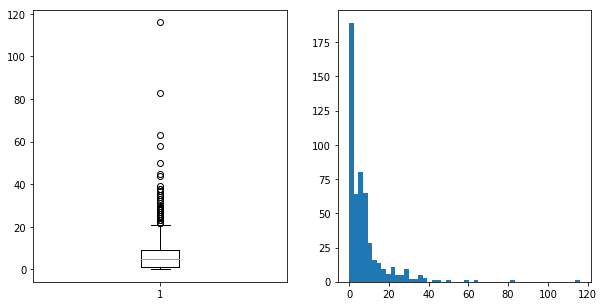

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plt.subplot(121)
_ = plt.boxplot(dftrain['total_cases'])
ax = plt.subplot(122)
_ = plt.hist(dftrain['total_cases'], bins=50)

In [23]:
dftrain['total_cases'].describe(percentiles=[.25, .5, .75,.95])

count    520.000000
mean       7.565385
std       10.765478
min        0.000000
25%        1.000000
50%        5.000000
75%        9.000000
95%       28.000000
max      116.000000
Name: total_cases, dtype: float64

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
nrows = dftrain['total_cases'].values.shape[0]
test_arry = dftrain['total_cases'].values.reshape(nrows,1)
clf = IsolationForest(max_samples=nrows, random_state=42)
clf.fit(test_arry)
clf.predict(np.array([[79]]))
np.percentile(test_arry,95)

28.0

In [25]:
dftemp = dftrain.columns.copy().values
nrows = dftemp.shape[0]
clf = IsolationForest(max_samples=nrows, random_state=42)
clf.fit(test_arry)
clf.predict(np.array([[79]]))
np.percentile(test_arry,75)*1.5

13.5

## View data as time series

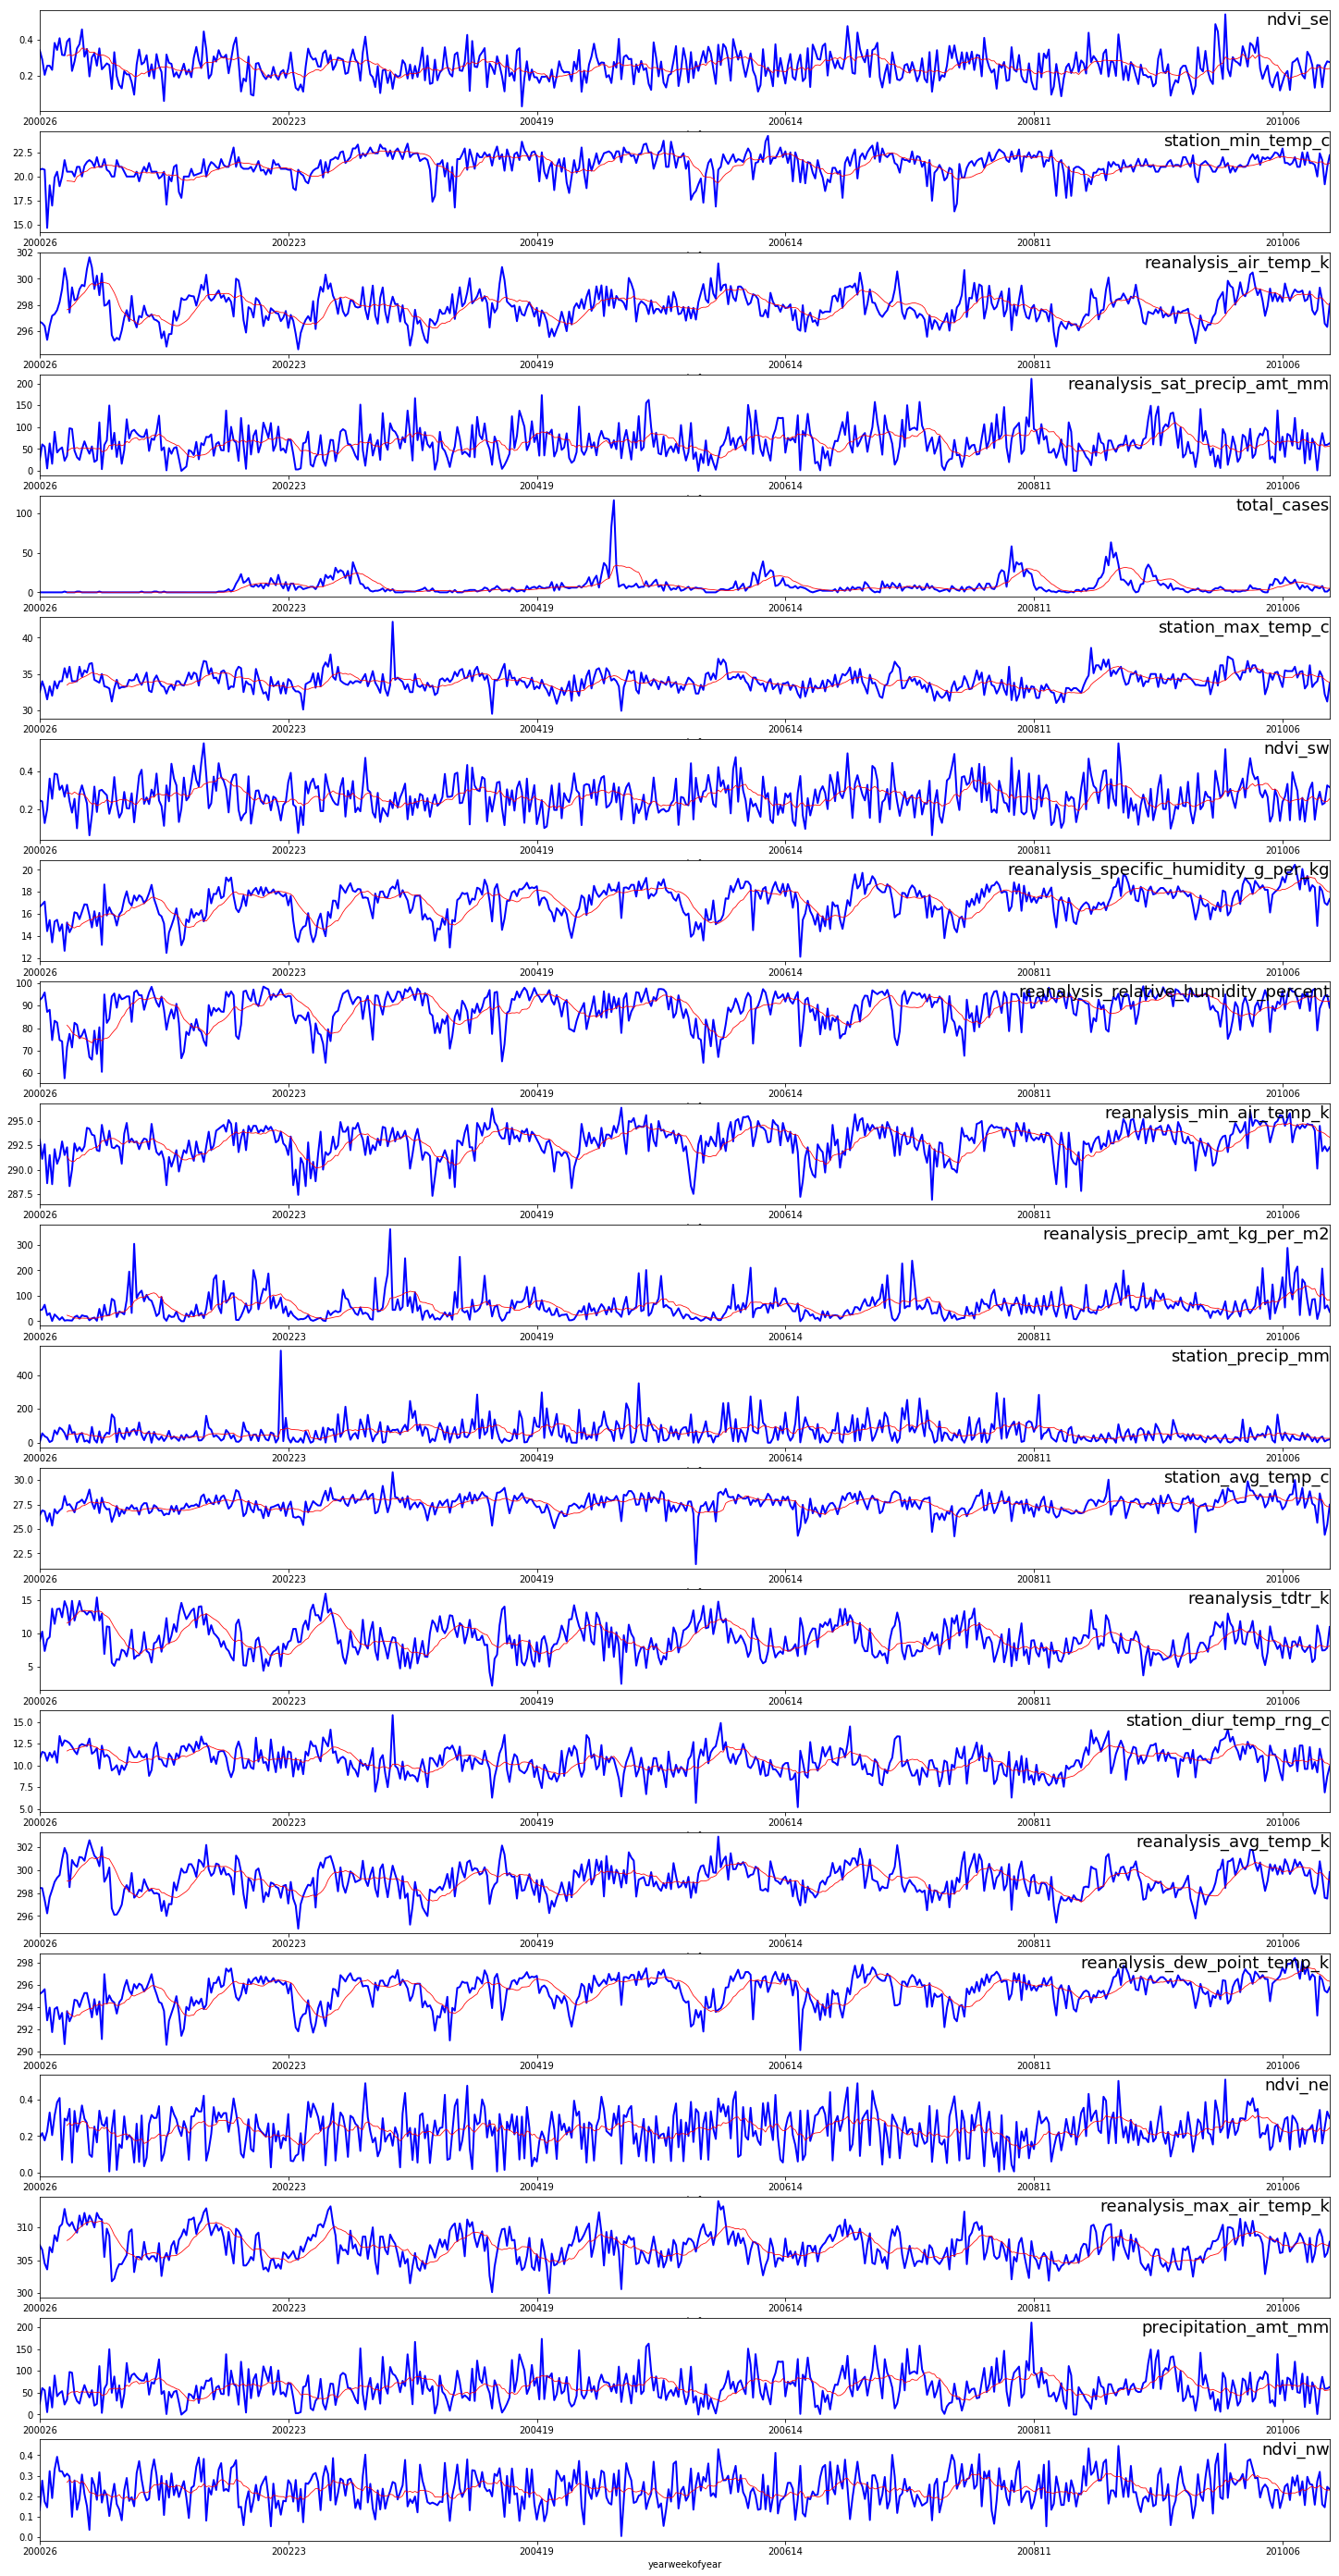

In [26]:
myutil.plot_cols2(dftrain)